In [1]:
from typing import Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve, learning_curve

In [2]:
data=pd.read_csv('data30.csv')
print('data.shape={} rows, {} columns'.format(*data.shape))
print(f'data {len(data.index)} rows, {len(data.axes[1])} columns')
data.head(4)

data.shape=100000 rows, 394 columns
data 100000 rows, 394 columns


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V335              float64
V336              float64
V337              float64
V338              float64
V339              float64
Length: 394, dtype: object

In [4]:
%%time
for c in data.dtypes[data.dtypes==object].keys():
    print('---- %s -----' %c)
    print(data[c].value_counts())

---- ProductCD -----
W    56878
H    15521
R    13724
C    11351
S     2526
Name: ProductCD, dtype: int64
---- card4 -----
visa                65602
mastercard          29599
american express     3330
discover             1462
Name: card4, dtype: int64
---- card6 -----
debit              64923
credit             35063
debit or credit        7
charge card            3
Name: card6, dtype: int64
---- P_emaildomain -----
gmail.com           36290
yahoo.com           15883
anonymous.com        8663
hotmail.com          8119
aol.com              4866
comcast.net          1856
icloud.com            894
msn.com               852
outlook.com           767
att.net               694
sbcglobal.net         671
verizon.net           626
live.com              501
bellsouth.net         440
cox.net               376
me.com                373
ymail.com             369
yahoo.com.mx          292
charter.net           233
optonline.net         212
live.com.mx           133
mac.com               122
rocketm

In [5]:
data.isna().sum()

TransactionID         0
isFraud               0
TransactionDT         0
TransactionAmt        0
ProductCD             0
                  ...  
V335              68229
V336              68229
V337              68229
V338              68229
V339              68229
Length: 394, dtype: int64

In [6]:
data.fillna(0, inplace=True)

In [7]:
data.isna().sum()

TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
ProductCD         0
                 ..
V335              0
V336              0
V337              0
V338              0
V339              0
Length: 394, dtype: int64

In [14]:
cat_features=['M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9']

In [16]:
data[['TransactionAmt', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1']].isna().sum()

TransactionAmt    0
card1             0
C1                0
C2                0
C3                0
C4                0
C5                0
C6                0
C7                0
C8                0
C9                0
C10               0
C11               0
C12               0
C13               0
C14               0
D1                0
dtype: int64

In [17]:
#x_train, x_valid=train_test_split(data.drop(
#    ['TransactionID', 'isFraud', 'ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'], axis=1),
#                                  train_size=0.7, shuffle=True, random_state=1)

x_train, x_valid=train_test_split(data
    [[ 'TransactionAmt', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1']],
                                  train_size=0.7, shuffle=True, random_state=1)

y_train, y_valid=train_test_split(data['isFraud'], train_size=0.7, shuffle=True, random_state=1)

print(f'x_train = {len(x_train.axes[0])} rows, {len(x_train.axes[1])} columns')
print(f'x_valid = {len(x_valid.axes[0])} rows, {len(x_valid.axes[1])} columns')

x_train = 70000 rows, 17 columns
x_valid = 30000 rows, 17 columns


In [18]:
%%time
model=DecisionTreeClassifier(random_state=1)
model.fit(x_train, y_train)

Wall time: 342 ms


DecisionTreeClassifier(random_state=1)

In [19]:
train_score=roc_auc_score(y_train, model.predict_proba(x_train)[:,1])
valid_score=roc_auc_score(y_valid, model.predict_proba(x_valid)[:,1])

print(f'train_score= {round(train_score, 34)}, valid_score= {round(valid_score, 5)}')

train_score= 0.999969416935695, valid_score= 0.78439


In [27]:
def plot_validation_curves (train_scores: np.array, valid_scores: np.array, figsize: Tuple[int, int] = (12, 8)):
    
    fig=plt.figure(figsize=figsize)
    
    plt.title('Validation Curves', size=15)
    
    plt.plot(range(train_scores.shape[0]), np.mean(train_scores, axis=1), label='Train', linewidth=3, marker='s')
    
    plt.fill_between(x=range(train_scores.shape[0]), y1=np.mean(train_scores, axis=1)-np.std(train_scores, axis=1), y2=np.mean(train_scores, axis=1)+np.std(train_scores, axis=1), alpha=0.25)
    
    plt.plot(range(train_scores.shape[0]), np.mean(valid_scores, axis=1), label='Valid', linewidth=3, marker='s')
    
    plt.fill_between(x=range(train_scores.shape[0]), y1=np.mean(valid_scores, axis=1)-np.std(valid_scores, axis=1), y2=np.mean(valid_scores, axis=1)+np.std(valid_scores, axis=1), alpha=0.25)
    
    plt.legend(loc='best', fontsize=14)
    plt.ylabel('roc_auc', size=15)

In [35]:
%%time
train_scores, valid_scores = validation_curve(
    X=x_train,
    y=y_train,
    estimator=DecisionTreeClassifier(random_state=1),
    param_range=[-1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    param_name='max_depth',
    scoring='roc_auc',
    n_jobs=-1,
    cv=5,)

Wall time: 2.91 s


In [36]:
train_scores.shape

(12, 5)

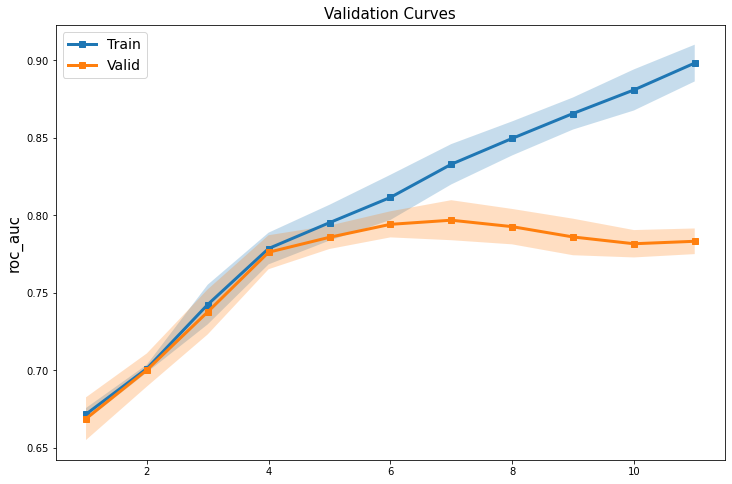

In [37]:
plot_validation_curves (train_scores, valid_scores)

In [38]:
np.mean(valid_scores, axis=1)

array([       nan, 0.66891588, 0.70032688, 0.73783158, 0.77629956,
       0.78593014, 0.79428181, 0.79695735, 0.79279986, 0.78614543,
       0.78176499, 0.78335514])